In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
token = 'secret_u1XebWgmw630Pu9Ckv3x7D3L9tIjZfaYNd11SdsyEDT'
databaseID ="398823e7b3a940d19497248d5d23d592"
headers = {
    "Authorization": "Bearer " + token,
    "Content-Type": "application/json",
    "Notion-Version": "2022-02-22"
}

In [3]:
readUrl = f"https://api.notion.com/v1/databases/{databaseID}/query"
res = requests.request("POST", readUrl, headers=headers)
data = res.json()

In [4]:
df_notion = pd.DataFrame(data['results'])
df_notion.head()

,object,id,created_time,last_edited_time,created_by,last_edited_by,cover,icon,parent,archived,in_trash,properties,url,public_url
0,page,00ef9733-6dd9-4853-9eb6-9e8c9c7cac68,2024-04-24T14:45:00.000Z,2024-04-24T14:45:00.000Z,"{'object': 'user', 'id': 'e8e56058-4a16-406a-a...","{'object': 'user', 'id': 'e8e56058-4a16-406a-a...",None,None,"{'type': 'database_id', 'database_id': '398823...",False,False,"{'Tipo': {'id': 'GvhR', 'type': 'select', 'sel...",https://www.notion.so/00ef97336dd948539eb69e8c...,None
1,page,212e403d-bdd3-43b4-8fed-7c612e31b469,2024-04-24T14:29:00.000Z,2024-04-24T15:12:00.000Z,"{'object': 'user', 'id': 'e8e56058-4a16-406a-a...","{'object': 'user', 'id': 'e8e56058-4a16-406a-a...",None,None,"{'type': 'database_id', 'database_id': '398823...",False,False,"{'Tipo': {'id': 'GvhR', 'type': 'select', 'sel...",https://www.notion.so/Regress-o-Linear-teoria-...,None
2,page,7acf376d-a1b7-4c8d-bce7-eb23ff508a98,2024-04-24T14:28:00.000Z,2024-04-24T15:13:00.000Z,"{'object': 'user', 'id': 'e8e56058-4a16-406a-a...","{'object': 'user', 'id': 'e8e56058-4a16-406a-a...",None,"{'type': 'external', 'external': {'url': 'http...","{'type': 'database_id', 'database_id': '398823...",False,False,"{'Tipo': {'id': 'GvhR', 'type': 'select', 'sel...",https://www.notion.so/80-How-YOU-Should-Learn-...,None
3,page,88f3338f-da46-4b05-95e7-06b976fa3c62,2024-04-02T18:50:00.000Z,2024-04-02T18:50:00.000Z,"{'object': 'user', 'id': 'e8e56058-4a16-406a-a...","{'object': 'user', 'id': 'e8e56058-4a16-406a-a...",None,"{'type': 'external', 'external': {'url': 'http...","{'type': 'database_id', 'database_id': '398823...",False,False,"{'Tipo': {'id': 'GvhR', 'type': 'select', 'sel...",https://www.notion.so/5-ferramentas-de-IA-que-...,None
4,page,395a378c-ad8e-4c9e-af9f-1e1e34d1a4b3,2024-04-01T23:44:00.000Z,2024-04-01T23:44:00.000Z,"{'object': 'user', 'id': 'e8e56058-4a16-406a-a...","{'object': 'user', 'id': 'e8e56058-4a16-406a-a...",None,"{'type': 'external', 'external': {'url': 'http...","{'type': 'database_id', 'database_id': '398823...",False,False,"{'Tipo': {'id': 'GvhR', 'type': 'select', 'sel...",https://www.notion.so/Sandeep-Pawar-Microsoft-...,None


In [5]:
df_notion['tools'] = df_notion['properties'].apply(lambda x: x['Ferramenta']['select']['name'] if x['Ferramenta']['select'] is not None else None)
df_notion['category'] = df_notion['properties'].apply(lambda x: x['Categoria']['select']['name'] if x['Categoria']['select'] is not None else None)
df_notion['Type'] = df_notion['properties'].apply(lambda x: x['Tipo']['select']['name'] if x['Tipo']['select'] is not None else None)

In [6]:
df_notion.drop(columns=['properties', 'public_url', 'icon', 'url', 'created_by', 'last_edited_by', 'cover', 'parent', 'archived', 'in_trash', 'object'], inplace=True)

<Axes: ylabel='category'>

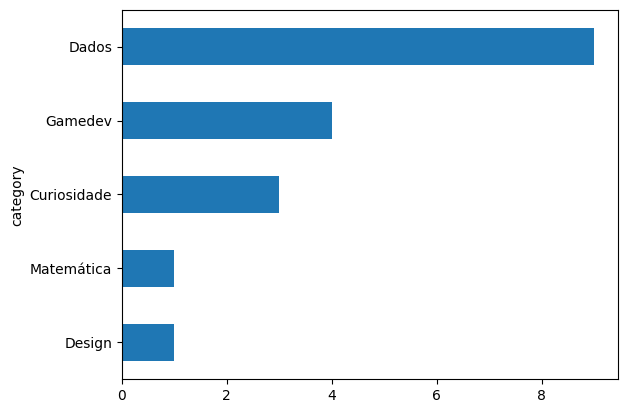

In [7]:
df_notion['category'].value_counts(ascending=True).plot(kind='barh')

<Axes: ylabel='tools'>

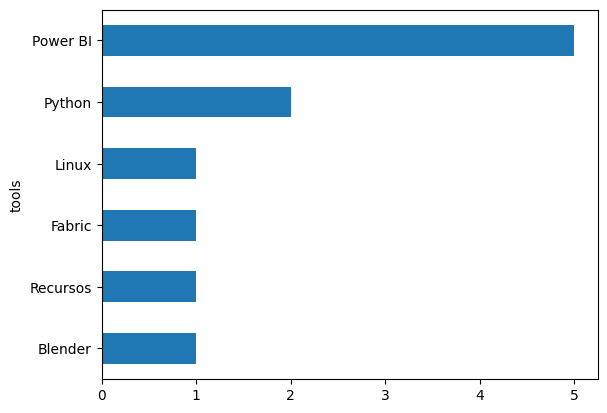

In [8]:
df_notion['tools'].value_counts(ascending=True).plot(kind='barh')

In [22]:
!pip install --upgrade nbformat


In [23]:
import plotly.express as px

# Calculate the value counts for each category
category_counts = df_notion['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# Create the bar chart
fig = px.bar(category_counts, x='category', y='count', title='Category Counts')
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed